In [15]:
#TODO: Added libaries and tools
import numpy as np # for handling numbers
import pandas as pd # for handling spreadsheet data
import os # to retrive data-set files
import cv2# computer vision for extracting features from images
import PIL
import pickle 
from sklearn import metrics
from sklearn.metrics import accuracy_score
print('i')



i


In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  r2_score


In [4]:
##feature extraction

In [5]:
# function to load dataset into a data frame
# Encaplsated in a function to restrict the scope of variables that will not be needed in
# later code blocks.
# gray scale flag, by default it's off
# ResizeX and ResizeY, fills these to resize image to desired size, if either
# is 0 it's assumed to be off
def loadData(grayscale:bool = False, resizeX: int = 0, resizeY = 0):
    # helper function to fill the data variables with data from images
    def fillData(data: dict,dir: str, label:str):
        # list of all files in dir
        # these values are the image files
        list = os.listdir(dir)
        # append image paths and labels in data dictionary
        for image in list:
            absImagePath = os.path.join(dir,image)
            data['image'].append(absImagePath)
            data['label'].append(label)
            fileImage = cv2.imread(absImagePath)
            # image gray scale
            if(grayscale == True):
                fileImage = cv2.cvtColor(fileImage,cv2.COLOR_BGR2GRAY)
            if(resizeX > 0 and resizeY > 0):
                target_size = (resizeX,resizeY)
                fileImage = cv2.resize(fileImage,target_size)
            data['features'].append(fileImage.flatten())
            
    # dictionary to temporary house the data
    # image = image path list, label = fake or real
    trainData = {'image':[],'label':[], 'features':[]}
    testData = {'image':[],'label':[], 'features':[]}
   
    # Read Train folder & Read test folder
    # OS module used to ensure this works on all platforms that python runs on
    currentDir = os.getcwd() # get's current directory to later append to image filepath for abs path
    trainDirReal = os.path.join(currentDir,"train",'REAL') # abs file path to real class folder in training
    trainDirFake = os.path.join(currentDir,'train','FAKE')
    testDirReal = os.path.join(currentDir,"test",'REAL')
    testDirFake = os.path.join(currentDir,"test",'FAKE')  


    # helper function read file list from each folder and append abs path and labels
    fillData(trainData,trainDirReal,'REAL')
    fillData(trainData,trainDirFake,'FAKE')
    fillData(testData,testDirReal,'REAL')
    fillData(testData,testDirFake,'FAKE')
    
    #TODO: Feature extraction
    
    # converts from dictionary type to dataframe for ease of access and compadability with
    # ML library function calls
    return pd.DataFrame(trainData), pd.DataFrame(testData)
# executes function, returning 2 dataframes containing train and test data of the calsses
# Train and test data are seperated into different dataframes to enforce data hygiene 
trainData,testData = loadData()
# test if data was loaded successfully by outputing first 10 entries
trainData.head(10)

,image,label,features
0,C:\Users\venka\Downloads\train\REAL\4000 (10).jpg,REAL,"[146, 166, 124, 137, 142, 80, 218, 189, 84, 20..."
1,C:\Users\venka\Downloads\train\REAL\4000 (2).jpg,REAL,"[237, 218, 227, 219, 205, 211, 209, 202, 207, ..."
2,C:\Users\venka\Downloads\train\REAL\4000 (3).jpg,REAL,"[195, 174, 176, 193, 175, 176, 194, 176, 177, ..."
3,C:\Users\venka\Downloads\train\REAL\4000 (4).jpg,REAL,"[74, 102, 133, 0, 23, 53, 3, 20, 47, 35, 46, 6..."
4,C:\Users\venka\Downloads\train\REAL\4000 (5).jpg,REAL,"[181, 165, 152, 182, 166, 153, 183, 167, 154, ..."
5,C:\Users\venka\Downloads\train\REAL\4000 (6).jpg,REAL,"[56, 37, 29, 48, 31, 22, 81, 63, 56, 171, 158,..."
6,C:\Users\venka\Downloads\train\REAL\4000 (7).jpg,REAL,"[90, 92, 92, 86, 88, 88, 66, 67, 71, 86, 87, 9..."
7,C:\Users\venka\Downloads\train\REAL\4000 (8).jpg,REAL,"[160, 211, 207, 156, 207, 200, 178, 222, 216, ..."
8,C:\Users\venka\Downloads\train\REAL\4000 (9).jpg,REAL,"[110, 98, 98, 112, 100, 100, 115, 102, 100, 11..."
9,C:\Users\venka\Downloads\train\REAL\4000.jpg,REAL,"[252, 252, 255, 250, 253, 255, 243, 251, 255, ..."


In [6]:
model = LinearRegression()


In [29]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)



model.fit(X_train,y_train)

type(X_train)


numpy.ndarray

In [8]:
# Extract for training 
Y_train = np.asarray(trainData['label'].to_list())
X_train = np.asarray(trainData['features'].to_list())[ :, 0]
# Extract for test 
Y_test = np.asarray(testData['label'].to_list())
X_test = np.asarray(testData['features'].to_list())[ :, 0]
# Reshape X_train if it's a 1D array
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
# Define a mapping dictionary
# Define a mapping dictionary
mapping = {'REAL': 1, 'FAKE': -1}

# Apply mapping to convert string values to numeric values
Y_train_encoded = np.array([mapping[label] for label in Y_train])
Y_test_encoded = np.array([mapping[label] for label in Y_test])



#Y_test = 
## Below is the placeholder for the Model
# Create a model


# Fit
#Y_pred = model.fit(X_train, Y_train).predict(X_test)

#_train
#print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (Y_test != Y_pred).sum()))

In [16]:
model = LinearRegression()
model.fit(X_train, Y_train_encoded)

LinearRegression()

In [17]:
predicted = model.predict(X_test)

In [18]:
#R^2 VALUE


In [19]:
r2 = r2_score(Y_test_encoded, predicted)
r2

0.05332213757949389

In [20]:
#LOGISTIC REGRESSION

In [22]:
from sklearn.linear_model import LogisticRegression



modell = LogisticRegression()
modell.fit(X_train, Y_train_encoded)

LogisticRegression()

In [23]:
predictedd = modell.predict(X_test)


In [25]:
accuracy = metrics.accuracy_score(Y_test_encoded, predictedd)

In [26]:
print(accuracy)

0.5845


In [27]:
# Confusion matrix
conf_matrix = metrics.confusion_matrix(Y_test_encoded, predictedd)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[3099 1901]
 [2254 2746]]


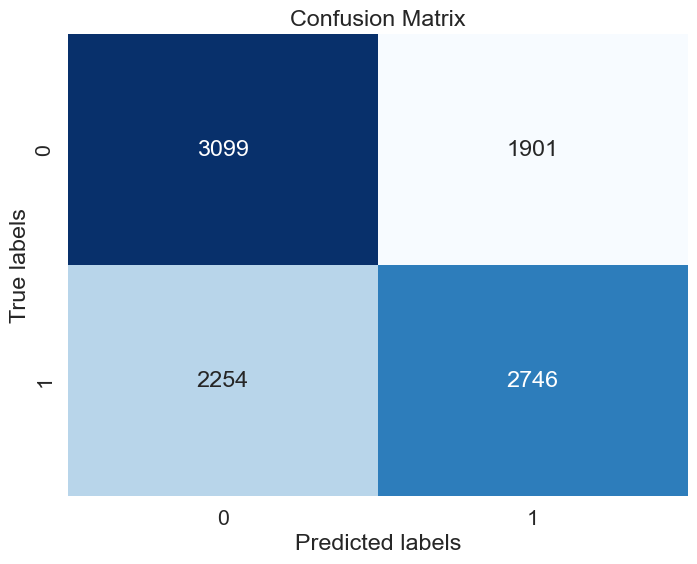

In [30]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()